In [94]:
#--------------------------- Import libraries -----------------------------
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_auc_score

In [95]:
train_data=pd.read_csv("C:/Users/DELL/OneDrive/Desktop/HappyBankCompitition/train_s3TEQDk.csv")
train_data.info()
train_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [96]:
train_data.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [97]:
print(set(train_data["Region_Code"]))
print(set(train_data["Occupation"]))
print(set(train_data["Channel_Code"]))
print(set(train_data["Credit_Product"]))
print(set(train_data["Vintage"]))

{'RG282', 'RG272', 'RG252', 'RG250', 'RG284', 'RG265', 'RG277', 'RG267', 'RG254', 'RG276', 'RG279', 'RG251', 'RG262', 'RG274', 'RG273', 'RG261', 'RG268', 'RG258', 'RG266', 'RG255', 'RG253', 'RG263', 'RG278', 'RG264', 'RG257', 'RG270', 'RG259', 'RG275', 'RG271', 'RG256', 'RG269', 'RG281', 'RG280', 'RG283', 'RG260'}
{'Self_Employed', 'Entrepreneur', 'Salaried', 'Other'}
{'X4', 'X1', 'X3', 'X2'}
{nan, 'No', 'Yes'}
{128, 129, 133, 134, 7, 8, 9, 135, 13, 14, 15, 19, 20, 21, 25, 26, 27, 31, 32, 33, 37, 38, 39, 43, 44, 45, 49, 50, 51, 55, 56, 57, 61, 62, 63, 67, 68, 69, 73, 74, 75, 79, 80, 81, 85, 86, 87, 91, 92, 93, 97, 98, 99, 103, 104, 105, 109, 110, 111, 115, 116, 117, 121, 122, 123, 127}


c:\program files\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


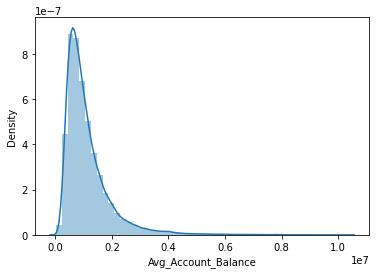

In [98]:
sns.distplot(train_data['Avg_Account_Balance'])
plt.show()

In [99]:
#************************ Preprocessing Train_data ************************

#---------------- Dropping ID --------------------
train_data = train_data.drop(["ID"],axis = 1)

#--------------- Eliminating missing values from (credit_Product column) -------------
train_data['Credit_Product'].fillna(method='bfill', inplace=True)

#-------------- Label Encoding ----------------------------
le=LabelEncoder()

train_data['Is_Active_enc']= le.fit_transform(train_data['Is_Active'])
train_data['Gender_enc']= le.fit_transform(train_data['Gender'])
train_data['Region_Code_enc']= le.fit_transform(train_data['Region_Code'])
train_data = train_data.drop(["Gender"],axis = 1)
train_data = train_data.drop(["Is_Active"],axis = 1)
train_data=train_data.drop('Region_Code',axis=1)

#------------------ One Hot Encoding ---------------------------
#One Hot Encoding for Channel_Code
ch_code = pd.get_dummies(train_data.Channel_Code, prefix='CC_',drop_first=True)
train_data=pd.concat([train_data,ch_code],axis=1)
train_data=train_data.drop('Channel_Code',axis=1)

#One Hot Encoding for Occupation
occu = pd.get_dummies(train_data.Occupation, prefix='OCCU_',drop_first=True)
train_data=pd.concat([train_data,occu],axis=1)
train_data=train_data.drop('Occupation',axis=1)

#One Hot Encoding for Credit_Product
cp = pd.get_dummies(train_data.Credit_Product, prefix='CP',drop_first=True)
train_data=pd.concat([train_data,cp],axis=1)
train_data=train_data.drop('Credit_Product',axis=1)

#------------ Normalize ---------------------------
train_data['Avg_Account_Balance'] = np.log(train_data['Avg_Account_Balance'])
# normalize Age and Vintage


#rescaling feature
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
# Scaled feature 
train_data[["Age_rescaled","Vintage_rescaled","Avg_Account_Balance_res"]] = min_max_scaler.fit_transform(train_data[["Age","Vintage","Avg_Account_Balance"]])                                                                          
np.set_printoptions(precision=3)
train_data=train_data.drop('Age',axis=1)
train_data=train_data.drop('Vintage',axis=1)
train_data=train_data.drop('Avg_Account_Balance',axis=1)
#train_data=train_data.drop('Region_Code',axis=1)

In [100]:
train_data.columns

Index(['Is_Lead', 'Is_Active_enc', 'Gender_enc', 'Region_Code_enc', 'CC__X2',
       'CC__X3', 'CC__X4', 'OCCU__Other', 'OCCU__Salaried',
       'OCCU__Self_Employed', 'CP_Yes', 'Age_rescaled', 'Vintage_rescaled',
       'Avg_Account_Balance_res'],
      dtype='object')

In [101]:
train_data

,Is_Lead,Is_Active_enc,Gender_enc,Region_Code_enc,CC__X2,CC__X3,CC__X4,OCCU__Other,OCCU__Salaried,OCCU__Self_Employed,CP_Yes,Age_rescaled,Vintage_rescaled,Avg_Account_Balance_res
0,0,0,0,18,0,1,0,1,0,0,0,0.806452,0.281250,0.630865
1,0,0,0,27,0,0,0,0,1,0,0,0.112903,0.195312,0.536510
2,0,1,0,18,0,1,0,0,0,1,0,0.532258,0.148438,0.687265
3,0,0,1,20,0,0,0,0,1,0,0,0.177419,0.093750,0.502253
4,0,0,0,32,0,0,0,0,1,0,0,0.112903,0.203125,0.604324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,0,0,1,34,0,1,0,0,0,1,0,0.451613,0.796875,0.729175
245721,0,1,1,18,0,0,0,0,1,0,0,0.064516,0.062500,0.599937
245722,0,0,0,31,0,0,0,0,1,0,0,0.048387,0.046875,0.559344
245723,0,0,0,23,0,0,0,0,1,0,0,0.080645,0.187500,0.479123


In [102]:
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Is_Lead,Is_Active_enc,Gender_enc,Region_Code_enc,CC__X2,CC__X3,CC__X4,OCCU__Other,OCCU__Salaried,OCCU__Self_Employed,CP_Yes,Age_rescaled,Vintage_rescaled,Avg_Account_Balance_res
Is_Lead,1.000000,0.085723,0.072068,0.062501,0.131505,0.190141,0.003792,0.011509,-0.117351,0.076042,0.236129,0.230814,0.279642,0.073291
Is_Active_enc,0.085723,1.000000,0.064207,0.059576,0.159504,0.154555,0.024411,0.028119,-0.207638,0.164130,-0.091826,0.218770,0.209356,0.088535
Gender_enc,0.072068,0.064207,1.000000,0.004813,0.116018,0.080782,0.019916,0.025818,-0.122439,0.085863,0.054500,0.152076,0.146380,0.031780
Region_Code_enc,0.062501,0.059576,0.004813,1.000000,0.029700,0.090796,-0.008104,0.023762,-0.090778,0.055769,0.057208,0.117914,0.118810,0.097152
CC__X2,0.131505,0.159504,0.116018,0.029700,1.000000,-0.384311,-0.093931,0.000466,-0.323820,0.293304,0.093737,0.273153,0.144931,0.021909
CC__X3,0.190141,0.154555,0.080782,0.090796,-0.384311,1.000000,-0.094876,0.119213,-0.307399,0.163663,0.142919,0.456338,0.538829,0.130774
CC__X4,0.003792,0.024411,0.019916,-0.008104,-0.093931,-0.094876,1.000000,-0.014854,-0.061205,0.069401,0.056284,0.009252,-0.162419,-0.032686
OCCU__Other,0.011509,0.028119,0.025818,0.023762,0.000466,0.119213,-0.014854,1.000000,-0.407017,-0.527661,0.021652,0.394834,0.155663,0.067369
OCCU__Salaried,-0.117351,-0.207638,-0.122439,-0.090778,-0.323820,-0.307399,-0.061205,-0.407017,1.000000,-0.537284,-0.136370,-0.563227,-0.410109,-0.092929
OCCU__Self_Employed,0.076042,0.164130,0.085863,0.055769,0.293304,0.163663,0.069401,-0.527661,-0.537284,1.000000,0.087118,0.152652,0.221024,0.015018


In [103]:
X = train_data.drop(["Is_Lead"],axis = 1)
y = train_data["Is_Lead"]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [105]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(172007, 13)
(73718, 13)
(172007,)
(73718,)


In [106]:
RFClassifier = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=10,max_features='auto', random_state=0).fit(X_train,y_train)
print ("Accuracy of model :", RFClassifier.score(X_test,y_test))
y_pred = RFClassifier.predict(X_test)
print ("ROC_AUC_SCORE of model : ", roc_auc_score(y, RFClassifier.predict_proba(X)[:, 1]))

Accuracy of model : 0.7955180552917877
ROC_AUC_SCORE of model :  0.8078220885291847


In [107]:
Test_data=pd.read_csv("C:/Users/DELL/OneDrive/Desktop/HappyBankCompitition/test_mSzZ8RL.csv")
Test_data.info()
Test_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
      dtype='object')

In [108]:
#************************ Preprocessing Test_data ************************

#---------------- Dropping ID --------------------
ID_list=Test_data["ID"]
Test_data = Test_data.drop(["ID"],axis = 1)

#--------------- Eliminating missing values from (credit_Product column) -------------
Test_data['Credit_Product'].fillna(method='bfill', inplace=True)

#-------------- Label Encoding ----------------------------
le=LabelEncoder()

Test_data['Is_Active_enc']= le.fit_transform(Test_data['Is_Active'])
Test_data['Gender_enc']= le.fit_transform(Test_data['Gender'])
Test_data['Region_Code_enc']= le.fit_transform(Test_data['Region_Code'])
Test_data = Test_data.drop(["Gender"],axis = 1)
Test_data = Test_data.drop(["Is_Active"],axis = 1)
Test_data=Test_data.drop('Region_Code',axis=1)

#------------------ One Hot Encoding ---------------------------
#One Hot Encoding for Channel_Code
ch_code = pd.get_dummies(Test_data.Channel_Code, prefix='CC_',drop_first=True)
Test_data=pd.concat([Test_data,ch_code],axis=1)
Test_data=Test_data.drop('Channel_Code',axis=1)

#One Hot Encoding for Occupation
occu = pd.get_dummies(Test_data.Occupation, prefix='OCCU_',drop_first=True)
Test_data=pd.concat([Test_data,occu],axis=1)
Test_data=Test_data.drop('Occupation',axis=1)

#One Hot Encoding for Credit_Product
cp = pd.get_dummies(Test_data.Credit_Product, prefix='CP',drop_first=True)
Test_data=pd.concat([Test_data,cp],axis=1)
Test_data=Test_data.drop('Credit_Product',axis=1)

#------------ Normalize ---------------------------

# normalize Age and Vintage
Test_data['Avg_Account_Balance'] = np.log(Test_data['Avg_Account_Balance'])

#rescaling feature
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
# Scaled feature 
Test_data[["Age_rescaled","Vintage_rescaled","Avg_Account_Balance_res"]] = min_max_scaler.fit_transform(Test_data[["Age","Vintage","Avg_Account_Balance"]])                                                                          
np.set_printoptions(precision=3)
Test_data=Test_data.drop('Age',axis=1)
Test_data=Test_data.drop('Vintage',axis=1)
Test_data=Test_data.drop('Avg_Account_Balance',axis=1)
#Test_data=Test_data.drop('Region_Code',axis=1)

In [109]:
Test_data

,Is_Active_enc,Gender_enc,Region_Code_enc,CC__X2,CC__X3,CC__X4,OCCU__Other,OCCU__Salaried,OCCU__Self_Employed,CP_Yes,Age_rescaled,Vintage_rescaled,Avg_Account_Balance_res
0,0,1,4,0,0,0,1,0,0,1,0.081967,0.140625,0.574028
1,0,1,18,1,0,0,1,0,0,0,0.311475,0.328125,0.610280
2,0,1,20,0,0,0,0,1,0,0,0.114754,0.054688,0.371049
3,0,1,22,0,0,0,1,0,0,0,0.081967,0.203125,0.599743
4,0,0,20,0,0,0,1,0,0,0,0.081967,0.093750,0.553969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,1,1,18,1,0,0,0,1,0,1,0.459016,0.617188,0.860560
105308,0,1,27,1,0,0,1,0,0,1,0.508197,0.617188,0.647278
105309,0,1,4,0,0,1,0,1,0,0,0.180328,0.062500,0.710586
105310,1,1,4,0,1,0,1,0,0,0,0.475410,0.671875,0.572876


In [110]:
y_test_pred = RFClassifier.predict(Test_data)

In [111]:
z=zip(ID_list,list(y_test_pred))

for i,j in zip(list(y_test_pred),ID_list):
    print("ID=",j,"Pred=",i)


In [112]:
ID=[]
lead=[]
for i,j in zip(list(y_test_pred),ID_list):
    ID.append(j)
    lead.append(i)

# creating the DataFrame
result = pd.DataFrame({'ID': ID,'Is_Lead': lead})
result.to_csv('C:/Users/DELL/OneDrive/Desktop/HappyBankCompitition/solution3.csv',index=False)